## 5.1.2, 5.3.1, 5.7.1, 5.9.1

# 5.1.2

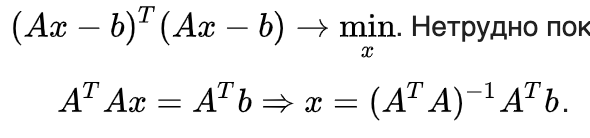

In [8]:
from IPython.display import Image
Image("/Users/alinacodzy/Screenshots/Screenshot2019-06-09at23.56.34.png")

In [9]:
import numpy as np

X = np.array([0, 0.375, 0.563, 0.75,
              1.125, 1.313, 1.5, 1.690,
              1.875, 2.063, 2.25, 2.438,
              2.625, 2.813, 3])
Y = np.array([4.568, 3.365, 2.810,
              2.624, 0.674, 0.557,
              0.384, -0.566, -1.44,
              -1.696, -1.91, -2.819,
              -3.625, -3.941, -4.367])


def MNK(X, Y, m):
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    return np.linalg.solve(A.T@A, A.T@Y)


def polynom(X, koefs):
    return np.sum(koefs*(X**np.arange(koefs.shape[0])))


In [11]:
sigmas = []
for m in range(10):
    koefs = MNK(X, Y, m)
    Y_pred = np.array([polynom(x, koefs) for x in X])
    sigma = np.sqrt(np.sum((Y_pred - Y)**2)/(Y.shape[0] - m))
    sigmas.append(sigma)
    
print(sigmas)

[2.7149005187422, 0.2365242281887295, 0.24464557985460963, 0.2543915059776197, 0.26556325200149095, 0.2739538245181688, 0.2826772563201388, 0.29895037813901154, 0.3110718755243903, 0.3087089667383798]


Text(0, 0.5, 'sigma')

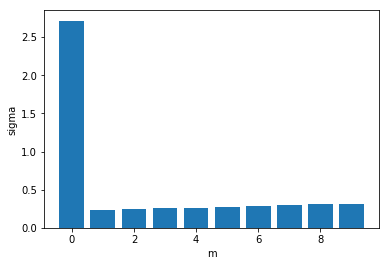

In [14]:
import matplotlib.pyplot as plt

plt.bar(np.arange(10), sigmas)
plt.xlabel('m')
plt.ylabel('sigma')

Сигма стабилизируется со степени 1 и возрастает до степени 8
Оптимальная степень  1

<IPython.core.display.Javascript object>


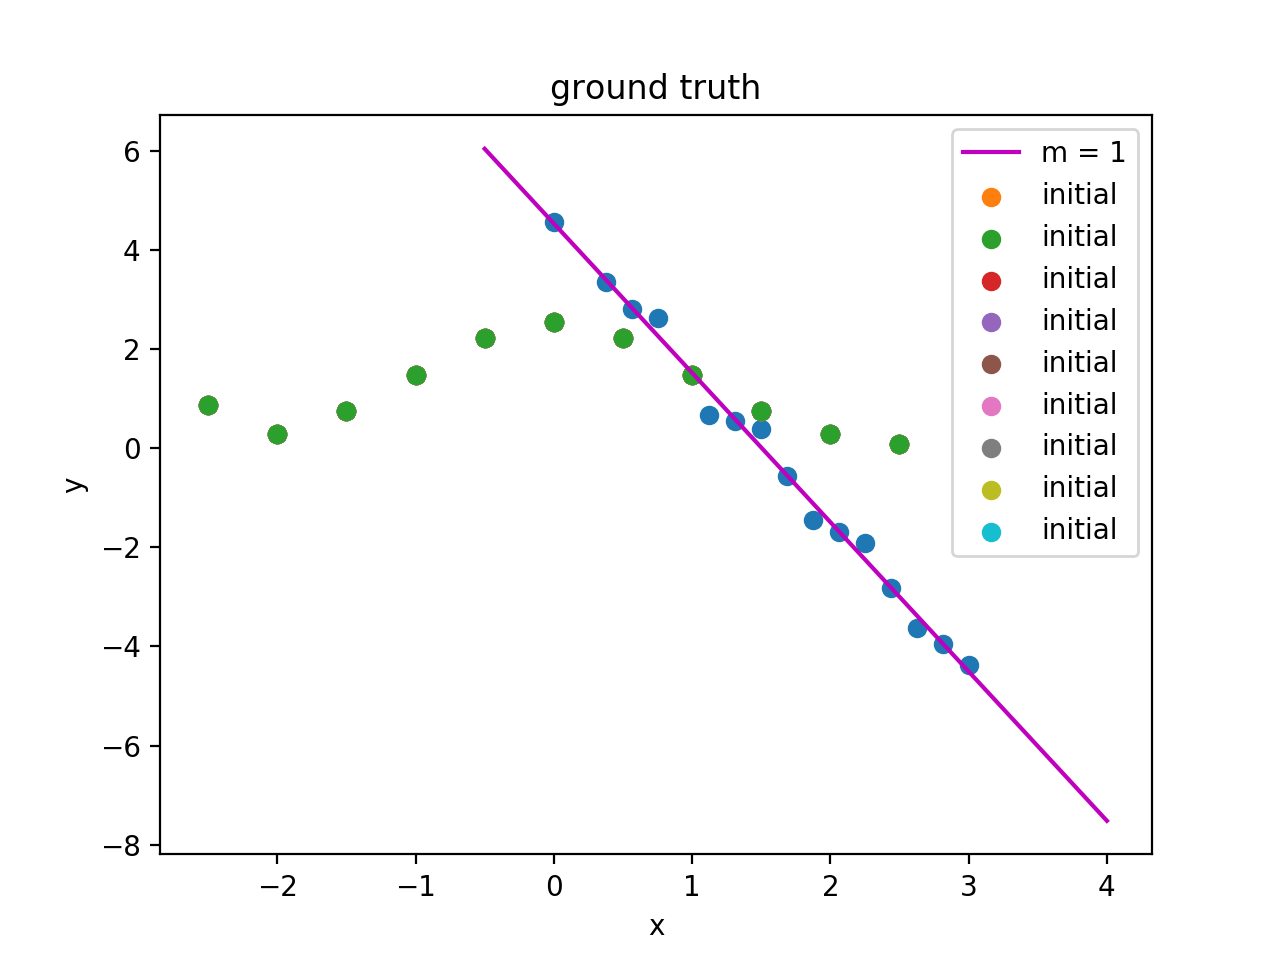

In [53]:
%matplotlib notebook

m_optimal = 1
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
X_test = np.linspace(-0.5, 4, 40)


koefs = MNK(X, Y, m)
Y_pred = np.array([polynom(x, koefs) for x in X_test])
plt.plot(X_test, Y_pred, label='m = ' + str(m), color='m')
plt.legend()

# 5.3.1

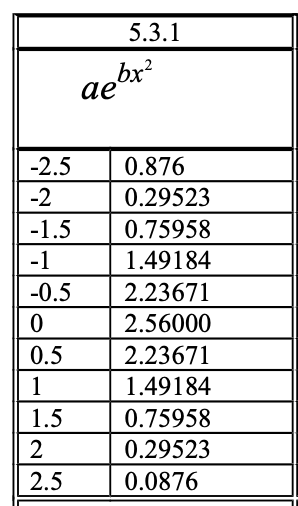

In [57]:
Image("/Users/alinacodzy/Screenshots/Screenshot2019-06-10at00.37.34.png")

In [77]:
X = np.array([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
Y = np.array([0.876, 0.29523, 0.75958,
               1.49184, 2.23671, 2.56000,
               2.23671, 1.49184, 0.75958,
               0.29523, 0.0876], dtype=float)

<IPython.core.display.Javascript object>


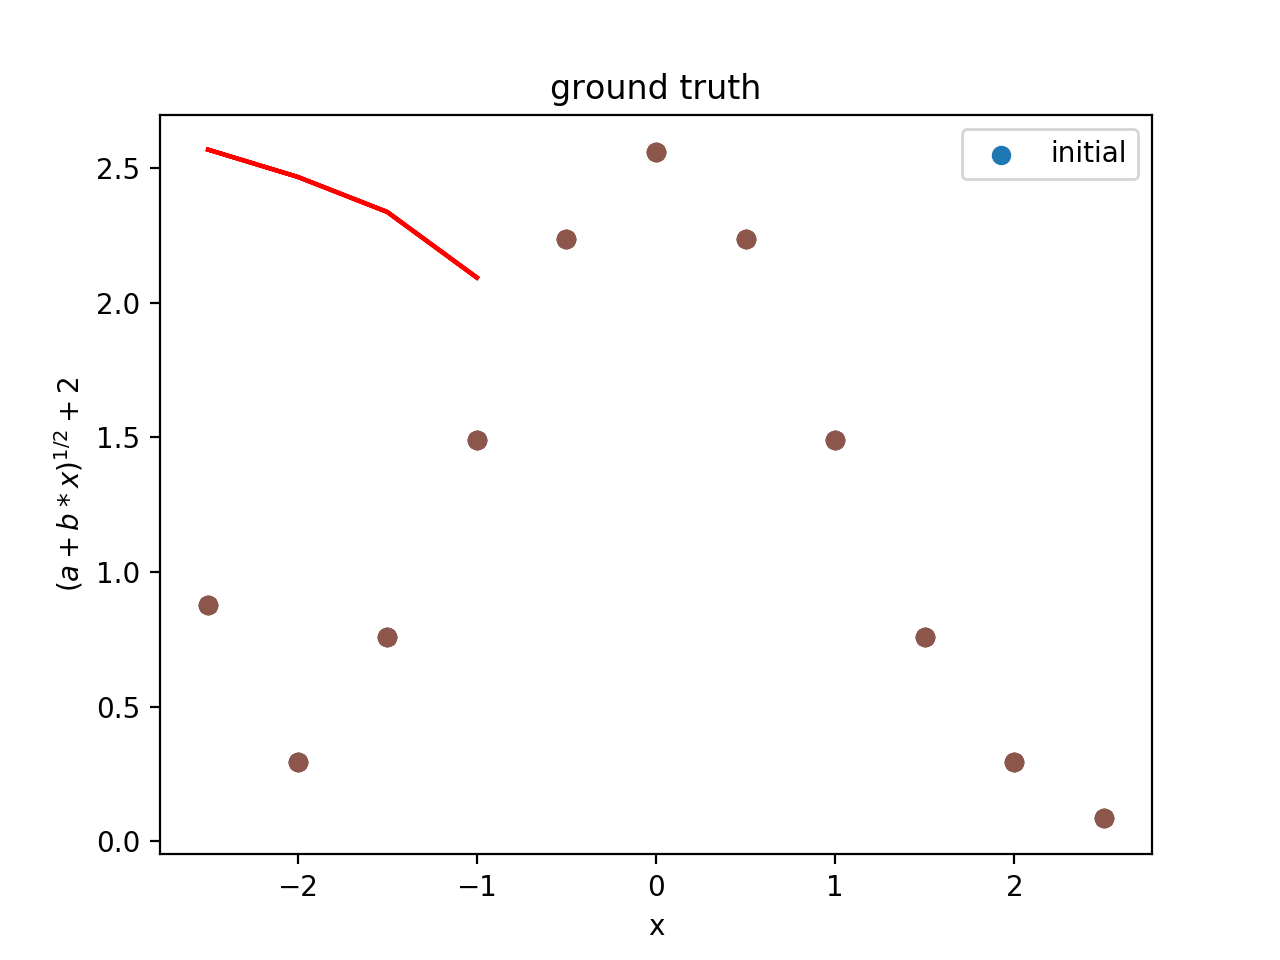

In [79]:
%matplotlib notebook

plt.scatter(X, Y, label='initial')
plt.title('ground truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


2.299335998706104 -0.2093259175449133


<IPython.core.display.Javascript object>


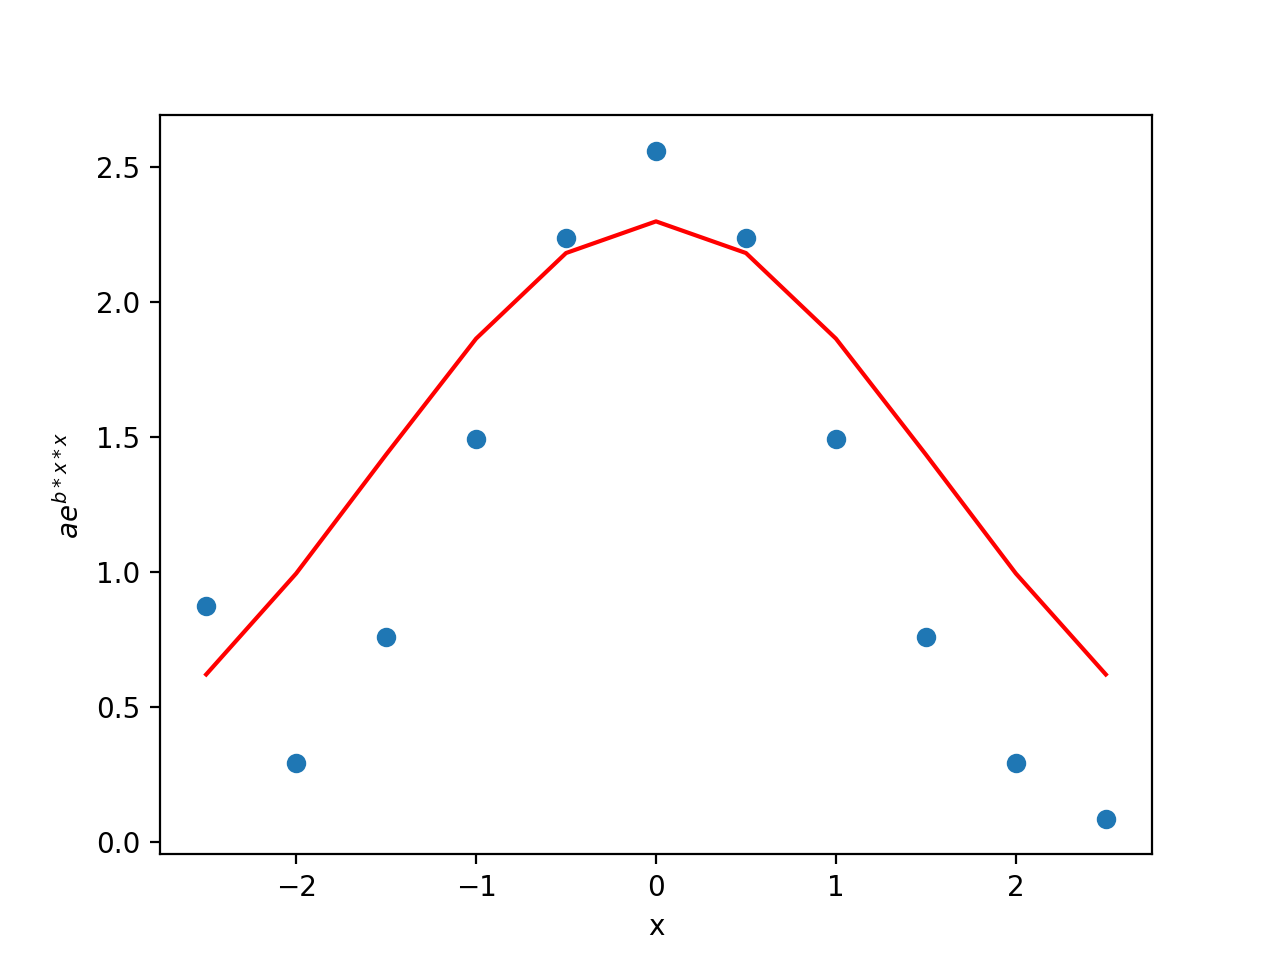

In [105]:
#Замена

t = np.array([x*x for x in X])
s = np.array([np.log(i) for i in Y]) + t

A = np.hstack([np.ones(len(X)).reshape(-1, 1), X.reshape(-1,1)])
a, b = np.linalg.lstsq(A, s, rcond=None)[0]

print(a, b)

%matplotlib notebook
plt.scatter(X, Y)
plt.plot(X, a*np.exp(b*X*X), c = 'r')
plt.xlabel('x')
plt.ylabel('$ae^{bx*x}$');

# 5.7.1

# 5.9.1